# Analysis of German Credit Risk Data

#### Jim Beno, for U.C. Berkeley Certificate in Machine Learning & Artificial Intelligence


### Table of Contents


* **[Business Requirements](#Business-Requirements)**
    * [Exploring Credit Risks](#Exploring-Credit-Risks)
    * [Data Description](#Data-Description)
* **[First Look at Data](#First-Look-at-Data)**
    * [Import Libraries](#Import-Libraries)
    * [Load and Examine Data](#Load-and-Examine-Data)
    * [Initial Impression](#Initial-Impression)
* **[Inspect Each Variable](#Inspect-Each-Variable)**
    * [Look at Unique Values](#Look-at-Unique-Values)
    * [Insights from Unique Value Summaries](#Insights-from-Unique-Value-Summaries)
    * [Demographic Insights](#Demographic-Insights)
    * [Plot Variable Distributions](#Plot-Variable-Distributions)
    * [Insights from Plots](#Insights-from-Plots)
* **[Data Cleaning and Transformation](#Data-Cleaning-and-Transformation)**
    * [Binary Variable Encodings](#Binary-Variable-Encodings)
    * [Categorical Variable Encodings](#Categorical-Variable-Encodings)
    * [Data Processing Steps](#Data-Processing-Steps)
    * [Sanity Check](#Sanity-Check)
* **[Explore Correlations](#Explore-Correlations)**
    * [Correlation Matrix](#Correlation-Matrix)
    * [Insights from Correlations](#Insights-from-Correlations)
    * [Individual Correlation Charts](#Individual-Correlation-Charts)
* **[Multivariate Chart Explorations](#Multivariate-Chart-Explorations)**
    * [Duration vs. Credit Amount](#Duration-vs.-Credit-Amount)
    * [Installment Commitment vs. Credit Amount](#Installment-Commitment-vs.-Credit-Amount)
    * [Age vs. Credit Amount by Gender](#Age-vs.-Credit-Amount-by-Gender)
    * [Gender vs. Age](#Gender-vs.-Age)
    * [Distribution of Age by Gender with Means](#Distribution-of-Age-by-Gender-with-Means)
    * [Number of Dependents vs. Age](#Number-of-Dependents-vs.-Age)
    * [Loan Purpose vs. Credit Amount](#Loan-Purpose-vs.-Credit-Amount)
    * [Loan Purpose Counts by Gender](#Loan-Purpose-Counts-by-Gender)
    * [Loan Purpose Proportions by Gender](#Loan-Purpose-Proportions-by-Gender)
    * [Credit History vs. Class](#Credit-History-vs.-Class)
    * [Employment vs. Class](#Employment-vs.-Class)
    * [Checking and Savings Status vs. Class](#Checking-and-Savings-Status-vs.-Class)
* **[Summary of Findings](#Summary-of-Findings)**

## Business Requirements

### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

### Data Description

The data set is the [Statlog (German Credit Data)](#https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data) from the UCI Machine Learning Repository. It classifies people described by a set of attributes as good or bad credit risks.

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

## First Look at Data

### Import Libraries

In addition to the usual libraries, I created a helper library that has some functions I use, it's imported as **myfunctions** as **my**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
import mytools as my

### Load and Examine Data

First step is to load the data and examine it. I'm using a few functions to do this:

* Scan the columns and values using `df.head()` and `df.tail()`
* In case there are too many columns, I set `pd.set_option('display.max_columns', None)` to "None" which is no limit. Now I can see if any column values need cleaning or processing.
* You can also load the .csv file in a Jupyter notebook tab by browsing the file system and opening `data/dataset_31_credit-g.csv`, though its performance on a large dataset is slow and laggy.
* Check the (a) variable types, (b) number of rows, and (c) amount of non-null values in `df.info()`
* Check the descriptive statistics and range of numerical values, especially the max and min, in `df.describe()`

In [2]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
df.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad
999,'0<=X<200',45,'critical/other existing credit','used car',4576,'100<=X<500',unemployed,3,'male single',none,4,car,27,none,own,1,skilled,1,none,yes,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [6]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Initial Impression

Surprisingly, the data looks pretty clean. This worries me, because I must be missing something. But there are 1,000 rows, and 1,000 non-null counts for each variable.

At first I thought I had poorly parsed HTML in some table cells, but upon closer inspection, we see there is a system here: (a) some values are surrounded by single quotes, probably because they can can contain multiple words, (b) the greater than and less than ranges are shown using < > <= => notation. 

## Inspect Each Variable

### Look at Unique Values

Let's take a closer look at the variables. I can't see all the possible values for each variable in the `df.head()` and `df.tail()` functions above. So I start this analysis by doing the following:
* Run `df.unique()` to find the number of unique values for each variable. This gives me clues to which ones are categorical vs. continuous numerical. 
* It looks like all the variables with 10 unique values or less are qualitative (categorical) or perhaps some small discrete numerical ranges. There are 3 that stand out as possibly being continuous numerical data:
    * duration (33)
    * credit_amount (921)
    * age (53)
* I don't want to look at the unique values for the continuous variables, but I do want to look at the others. I initially started doing this by hand, typeing `df['name'].unique()` for each variable. But the output as an array was hard to read, especially with the formatting some of these values have.
* So I wrote a little function called `my.get_unique()` ([GitHub](https://github.com/jbeno/mytools/tree/main)) that iterates through each variable that has a unique value count below a specified threshold (n, in this case 10). It then displays the unique values indented in plain text. It also strips out the single quotes, and has options to sort the values or even print out charts.

In [7]:
df.nunique(axis=0)

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [8]:
my.get_unique(df, 10, strip=True, sort='count', count=True, percent=True)


CATEGORICAL: Variables with unique values equal to or below: 10

checking_status has 4 unique values:

	no checking       394   39.4%
	<0                274   27.4%
	0<=X<200          269   26.9%
	>=200             63    6.3%

credit_history has 5 unique values:

	existing paid                        530   53.0%
	critical/other existing credit       293   29.3%
	delayed previously                   88    8.8%
	all paid                             49    4.9%
	no credits/all paid                  40    4.0%

purpose has 10 unique values:

	radio/tv                  280   28.0%
	new car                   234   23.4%
	furniture/equipment       181   18.1%
	used car                  103   10.3%
	business                  97    9.7%
	education                 50    5.0%
	repairs                   22    2.2%
	domestic appliance        12    1.2%
	other                     12    1.2%
	retraining                9     0.9%

savings_status has 5 unique values:

	<100                   603   60.3

### Insights from Unique Value Summaries

From the above output, I don't see any red flags on the data, it still looks pretty clean. And a few things stand out as possibly being worth exploring:
* **Class** appears to be the output variable that you'd want a model to predict. Based on all these other variables, do any have predictive power on credit risk?
* Some variables seem like good candidates that might have an effect on Class, and lead to some hypotheses:
    * **Credit History** – Having critical existing credit or delays would have a negative effect on Class
    * **Employment (or Job)** – Being unemployed would have a negative effect on Class
    * **Savings Status (and Checking Status)** – Low or no savings/checking would have a negative effect on Class
    * **Property (and Housing)** – Owning a home would have a positive effect on Class
    * **Other Parties** – Having a co-applicant or guarantor would have a positive effect on Class
    * **Other Payment Plans** – Having other payment plans would have a negative effect on Class (assuming this is current status, but if historical it may be a positive)
    * **Existing Credits** – Having existing lines of credit would have a negative effect on Class
    * **Age** – One would think a higher age would have a positive effect on Class, but I'm not so sure
* Some other observations of the data:
    * **Personal Status (and Gender)** – This seems to combine 2 variables: Marital Status and Gender. It may be worthwhile to separate these for independent analysis
    * **Installment Rate** – Installment rate (commitment) seems to be the interest rate in percentage of disposable income. I don't know the relationship here, will look for correlation to learn more.
    * **Purpose** – It will be interesting to see if the purpose of the loan has any effect on Class, or other variables. Or even to look at Age and Gender differences.

### Demographic Insights
We've also learned something from looking at the percentages of each categorical distribution:
* The majority of customers have a **"good" credit class** (70%)
* Almost all are **foreign workers!** (96.3%) I do believe this dataset came from Germany
* Most are **male** (69%) **skilled workers** (63%) that **own a home** (71.3%) and have just **1 dependent** (84.5%), themselves
* The most popular purpose is for a **Radio or TV** (28%), followed closely by a **new car** (23.4%)
* Most customers (60.3%) have a Savings Account with **less than 100 Deutsche Mark** (1 DEM = $0.55 USD)! No wonder they are applying for credit
* About half (53%) had a **paid credit** in their history, so they're repeat customers

If that describes the majority, and the majority has good credit, perhaps these are all the determinants of a good credit rating.

### Plot Variable Distributions

Next step is to start visualizing some of the data. I like to plot the distributions for all the variables. Originally I was doing this by just creating a PairPlot, but I found it hard to read the histograms, and it became a giant cumbersome chart. So I created a function called `my.plot_charts` ([GitHub](https://github.com/jbeno/mytools/tree/main)) that just outputs a bunch of Seaborn bar charts or histograms in a layout.

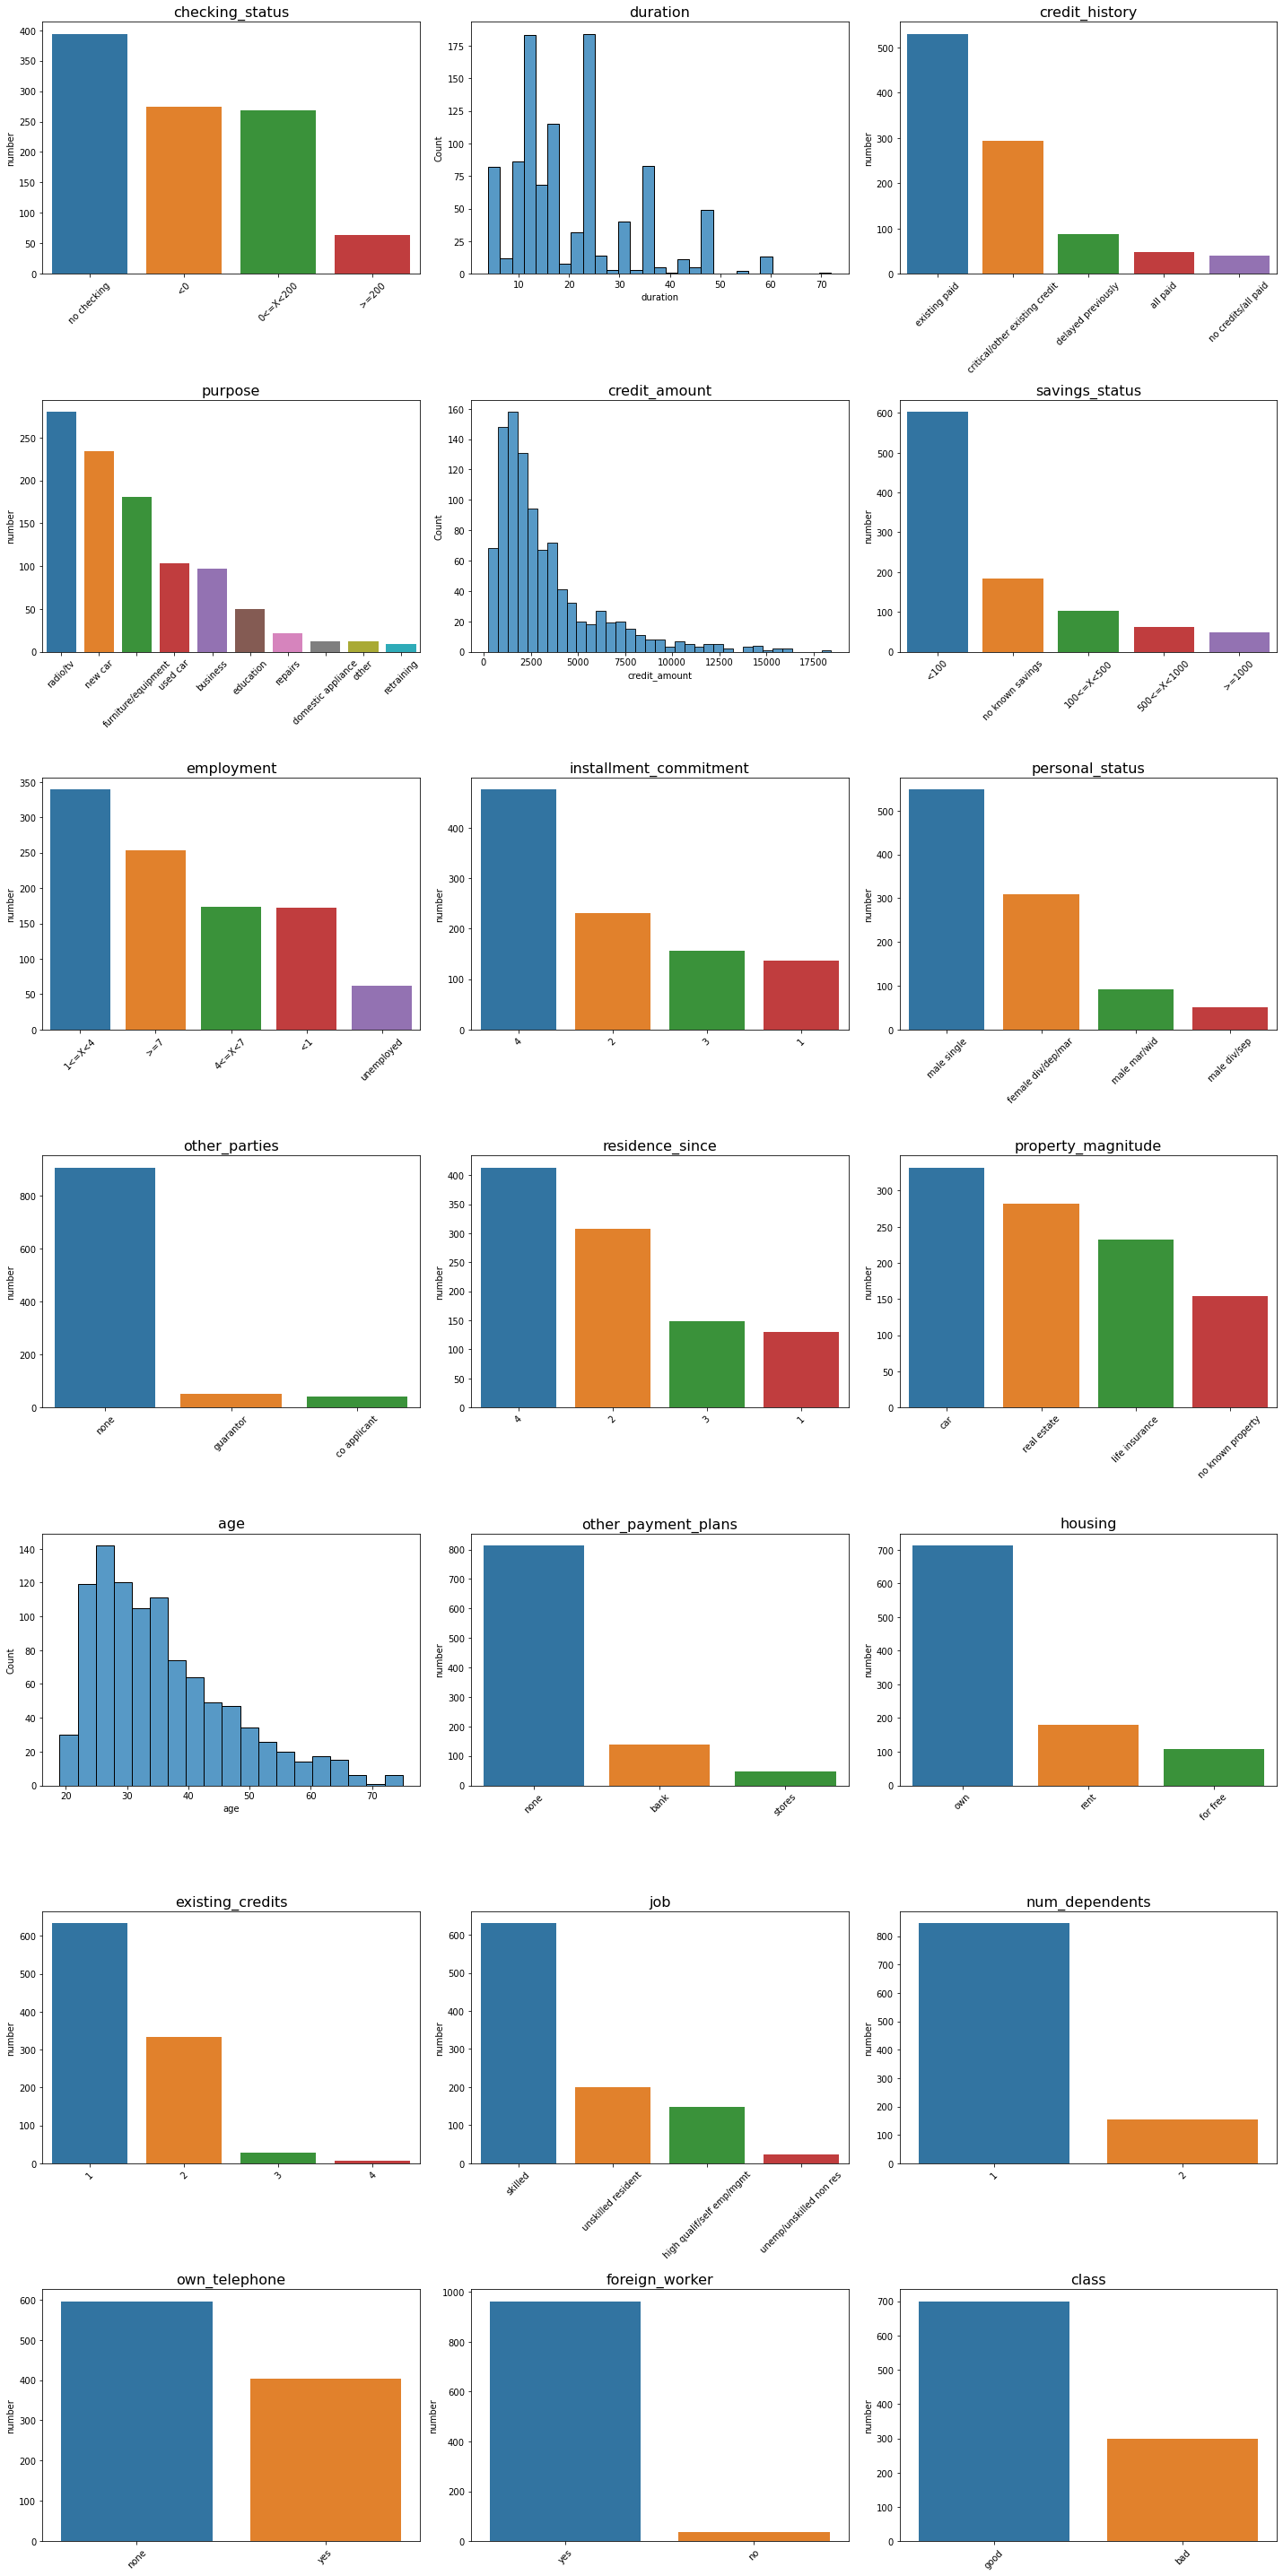

In [9]:
my.plot_charts(df)

### Insights from Plots

The insights from the bar plots have already been covered in the previous section. They're just showing a visual breakdown of the unique values we summarized above, and confirm the percentages and key takeaways.

But this is the first time we're seeing the distrubtions of the continuous numerical variables. We learn a few things from these plots:

* **Duration** of the loan is slightly skewed right with a median around **18 months**. Some are as short as 4 months, with the max being 72 months.
* **Credit Amount** is heavily skewed right with a median around **2,319 DEM** (about $1,292 USD). Probably enough to buy a really nice TV!
* **Age** is skewed right with a median around **33 years**. The youngest is 19, and the oldest is 75 years old

## Data Cleaning and Transformation

### Binary Variable Encodings

There are a few things I'd like to modify in this dataset:

* **Class** is the main output variable we'd like to predict, so to explore correlations with Class, I will convert its binary values "good" and "bad" to a 1 and 0.
    * **Class Encoded** (good = 1, bad = 0) will be added as a new column called "class_enc"
* **Personal Status** is really a mix of two variables (marital status, gender) that I'd like to separate for analysis. I can see how to split out gender. But the status values are not very clear (what is "dep"?), are inconsistently classified (female only has 1 value that includes div/dep/mar, but males have two: mar/wid and div/sep). So I will not create a separate column for that.
    * **Gender** (male, female) will be added as a new column called "gender"
    * **Gender Encoded** (male = 0, female = 1) will be added as a new column called "ender_enc"

### Categorical Variable Encodings

Some of these variables are recorded as nominal categorical values that represent a numeric range. I don't yet know best practices for this, but I think there is an opportunity to **convert them to a numeric scale**. There are a few options for this:
* **Binary 0 or 1** (Multiple columns) – Create a column for each value, with either a 0 or 1 to indicate the presence of that option. Not sure that would help here, but might be useful for machine learning later
* **Integer Scale** (One column) – Convert them to a numerical order like 0, 1, 2, 3, 4, 5, etc. These may represent the sequence, but not the magnitude or distance from each other. It may be non-sensical except for ordering and interpreting things visually that way
* **Lower Edge of Range** (One column – Consider each range as a "bin" of a histogram, and map them to the lower edge of that range, so for instance "None" maps to 0, "100<=X<500" maps to 100, ">=1000" maps to 1000, etc. It is more fidelity than pure nominal values, but we don't know if this is the actual value each record had. We can only say "it's at least this value". For some cases, there will be duplicate values (ex: two values could both be translated to "0")
* **Mean of Range** (One column) – Considering the same example, if each value represents a range, we could take the mean of that range (the mid-point) instead of the lower edge. So "None" would sitll map to 0, but "100<=X<500" would map to 250, though ">=1000" would still map to 1000. It seems inconsistent on the ends, and it may artificially inflate the values because I don't know where in the spectrum the actual values would fall. 

After thinking through the above, I think the **Lower Edge of Range** approach is the most accurate. It still reflects reality with the note that it's "at least this value, but could be higher". I'm assuming it's better than leaving it as nominal categorical data, so I'll experiment with this approach here:

* **Savings Status** will be converted as follows in a new column called "savings_status_enc":
    * 'no known savings' : **0**
    * '<100' : **1**
    * '100<=X<500' : **100**
    * '500<=X<1000' : **500**
    * '>=1000' : **1000**
* **Checking Status** will be converted as follows in a new column called "checking_status_enc":
    * 'no checking' : **0**
    * '<0' : **0**
    * '0<=X<200' : **1**
    * '>=200' : **200**
* **Employment** will be converted as follows in a new column called "employment_enc":
    * 'unemployed' : **0**
    * '<1' : **0**
    * '1<=X<4' : **1**
    * '4<=X<7' : **4**
    * '>=7' : **7**

### Data Processing Steps

I'll now create a duplicate of the dataframe as `df_enc` and add column for gender. After creating the mappings using dictionaries, I'll then add new columns to this dataframe using `df.map()`, passing the dictionary mappings. I'll then query the first 20 rows of all the associated columns for a sanity check.

In [10]:
# Create a dataframe for all the manipulation, in case I mess it up!
df_enc = df.copy()

In [11]:
# Create a new column for gender that extracts the "male" and "female" from personal_status
df_enc['gender'] = df_enc['personal_status'].apply(lambda x: 'female' if 'female' in x else 'male')

In [12]:
# Dictionary that maps class values as bad = 0, good = 1
class_map = {"bad" : 0, "good" : 1}

# Dictionary that maps gender values as male = 0, female = 1
gender_map = {"male" : 0, "female" : 1}

# Dictionary that maps savings account values to lower edge of range
savings_status_map = {"'no known savings'" : 0, "'<100'" : 1, "'500<=X<1000'" : 500, "'>=1000'" : 1000, "'100<=X<500'" : 100}

# Dictionary that maps checking account values to lower edge of range. Two of these seem to represent "0"
checking_status_map = {"'<0'" : 0, "'0<=X<200'" : 1, "'no checking'" : 0, "'>=200'" : 200}

# Dictionary that maps employment values to lower edge of range, now representing "whole years". Less than 1 year ends up as 0 as well
employment_map = {"'>=7'" : 7, "'1<=X<4'" : 1, "'4<=X<7'" : 4, 'unemployed' : 0, "'<1'" : 0}

In [13]:
# Create new columns and map the new values using the dictionaries
df_enc['class_enc'] = df_enc['class'].map(class_map)
df_enc['gender_enc'] = df_enc['gender'].map(gender_map)
df_enc['savings_status_enc'] = df_enc['savings_status'].map(savings_status_map)
df_enc['checking_status_enc'] = df_enc['checking_status'].map(checking_status_map)
df_enc['employment_enc'] = df_enc['employment'].map(employment_map)

### Sanity Check

To make sure everything was transformed correctly, need to do a sanity check by looking at some rows from the new dataframe (first, last, and a random sample using `df.sample()`. Then I'll check for any nulls or NaNs in each column by using `df.isna().sum()`

In [14]:
# Sanity check the results by reviewing the affected columns for the first 20 rows, and a random sample
#df_enc[:20][['class','class_enc','gender','gender_enc','savings_status','savings_status_enc','checking_status','checking_status_enc','employment','employment_enc']]
#df_enc[-20:][['class','class_enc','gender','gender_enc','savings_status','savings_status_enc','checking_status','checking_status_enc','employment','employment_enc']]
df_enc[['class','class_enc','gender','gender_enc','savings_status','savings_status_enc','checking_status','checking_status_enc','employment','employment_enc']].sample(20)

,class,class_enc,gender,gender_enc,savings_status,savings_status_enc,checking_status,checking_status_enc,employment,employment_enc
775,bad,0,female,1,'no known savings',0,'<0',0,'1<=X<4',1
894,good,1,male,0,'no known savings',0,'no checking',0,'1<=X<4',1
59,bad,0,female,1,'<100',1,'<0',0,'<1',0
999,good,1,male,0,'100<=X<500',100,'0<=X<200',1,unemployed,0
245,good,1,male,0,'<100',1,'no checking',0,'4<=X<7',4
548,bad,0,female,1,'<100',1,'<0',0,'1<=X<4',1
858,bad,0,female,1,'<100',1,'<0',0,'1<=X<4',1
563,bad,0,male,0,'no known savings',0,'0<=X<200',1,'1<=X<4',1
782,good,1,male,0,'<100',1,'0<=X<200',1,'1<=X<4',1
61,good,1,male,0,'no known savings',0,'0<=X<200',1,'>=7',7


In [15]:
# First time I ran this, I had some typos (I used single quotes in my mappings for class and gender, but they didn't have them) and saw a bunch of NaNs
# Check for any nulls/NaNs
df_enc.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
gender                    0
class_enc                 0
gender_enc                0
savings_status_enc        0
checking_status_enc       0
employment_enc            0
dtype: int64

## Explore Correlations

### Correlation Matrix

Now it's time to start looking at relationships between variables. We have a number of hypotheses about things that could impact a Credit Class. But do we see evidence of that in the data?
* The simplest way to start is to run `df_enc.corr()` across all the numeric variables, including the ones I just encoded. I'm rounding the decimels up to 3
* I'll then plot the `corr` dataframe using a Seaborn heatmap `sns.heatmap()`. I like to use the "RdYlGn" color map with "vmin" set to -1, and "vmax" set to 1. This way the strongest negative correlations are solid red, and the strongest positive correlations are solid green. Everything in the middle is yellow (or orange and light green).


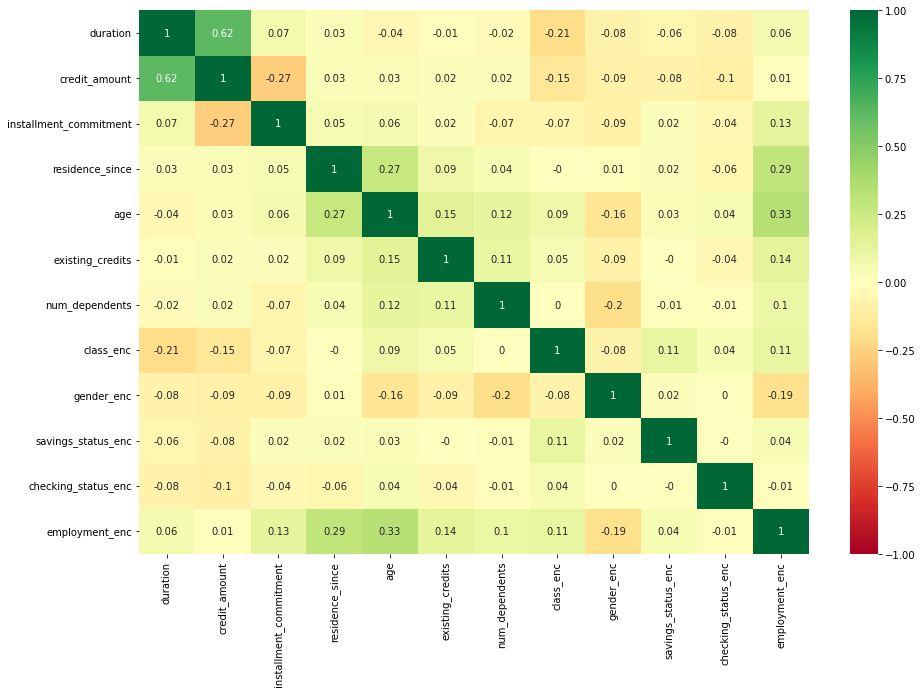

In [16]:
# Create the correlation, rounding decimels to 3
corr_enc = round(df_enc.corr(numeric_only=True), 2)

# Plot the correlation using sns.heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_enc, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
plt.show()

### Insights from Correlations

From the broad correlation plot above, here's what stands out to me:
* **Credit Amount vs. Duration** have the most positive correlation, which is strong at **0.62**
* **Credit Amount vs. Installment Commitment** have the most negative correlation, which is weak at **-0.27**
* A few demographic variables show some correlation with each other, which is not surprising:
    * **Age vs. Employment (Encoded)** have a weak positive correlation at **0.33**
    * **Residence Since vs. Employment (Encoded)** have a weak positive correlation at **0.29**
    * **Age vs. Residence Since** have a weak positive correlation at **0.27**
* **Gender** was the new variable we added, derived from Personal Status. Sinc we did the work to isolate it, let's see if there are any interesting correlations:
    * **Number of Dependents vs. Gender (Encoded)** have a weak negative correlation at **-0.20**. Male was 0, Female was 1, so does this mean number of dependents are likely to be less for females?
    * **Employment (Encoded) vs. Gender (Encoded)** have a weak negative correlation at **-0.19**. Male was 0, Female was 1, so does this mean women in this customer base are likely to be employed for less years?
    * **Age vs. Gender (Encoded)** have a weak negative correlation at **-0.16**. Male was 0, Female was 1, so does this mean women in this customer base are likely to be younger? That could explain why the previous two correlations are negative as well (younger women would not have many children and would be employed for less years)

**Credit Class** is the main variable of this dataset. As indicated in the description of this exercise, customers are classifed as having either "good" credit risk or "bad" credit risk, based on other attributes in this data set. We made some hypotheses earlier about what might be affecting credit class. We're not able to look at all of them, because they're not all in numeric form. But let's take a look at what we have:
* **Duration vs. Class (Encoded)** has the most negative correlation, which is weak at **-0.21**. This makes sense – the longer the duration, the longer time you have debt, and more risk that is taken on.
* **Credit Amount vs. Class (Encoded)** also has a weak neagive correlation at **-0.15**. This also makes sense – the more credit you take on, the more risk you have.
* **Savings Status (Encoded) vs. Class (Encoded)** has a weak positive correlation at **0.11**. This was one of our hypotheses, but it's a very low correlation, and based on encoding.
* **Employment (Encoded) vs. Class (Encoded)** has a weak positive correlation, also at **0.11**. This was one of our hypotheses, but it's a very low correlation, and based on encoding.

### Individual Correlation Charts

The heatmap matrix is nice to scan broadly for things of interest. But when presenting the correlation results, I didn't find a way to show just one slice of the heatmap (other than cropping a screenshot of it). It seemed like a good idea to summarize the correlations for one variable (against all others) on a bar chart. So I created a function called `my.plot_corr` ([GitHub](https://github.com/jbeno/mytools/tree/main)) that does this.

Every chart is on a fixed y axis from -1 to 1, so visually you can compare/contrast one chart with another to see where there are stronger vs. weaker correlations. Notice how much the strongest correlation (Credit Amount vs. Duration, 0.62) stands out in these charts below.

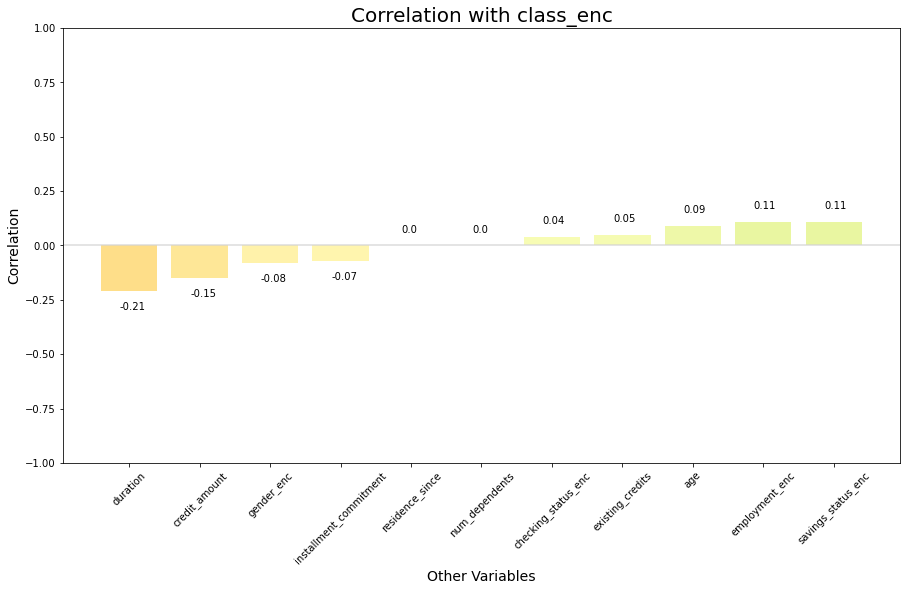

In [17]:
my.plot_corr(df_enc, 'class_enc')

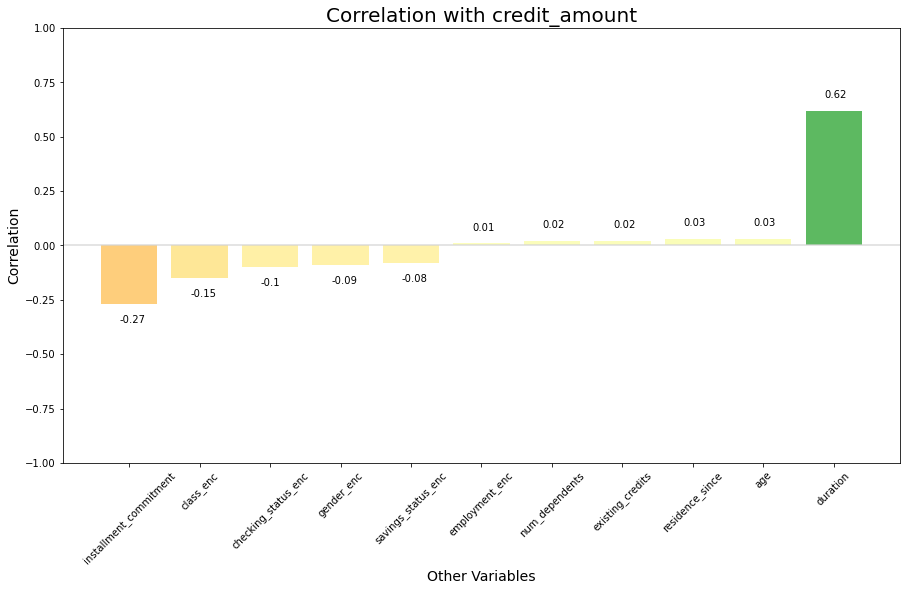

In [18]:
my.plot_corr(df_enc, 'credit_amount')

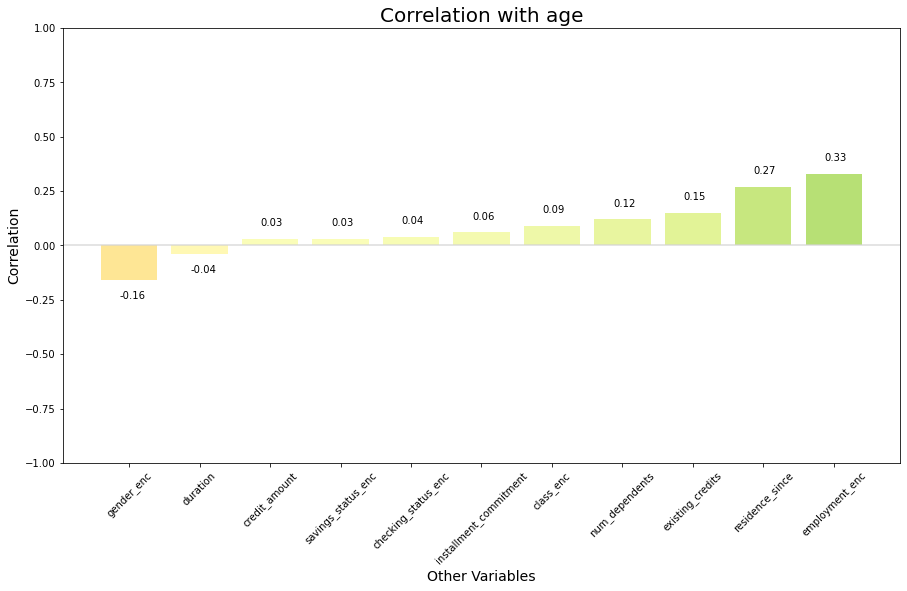

In [19]:
my.plot_corr(df_enc, 'age')

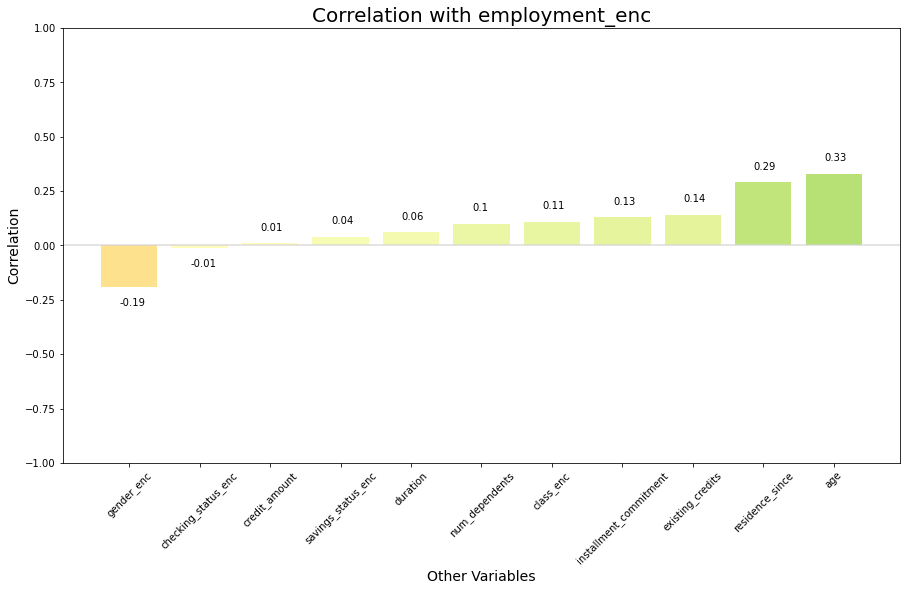

In [20]:
my.plot_corr(df_enc, 'employment_enc')

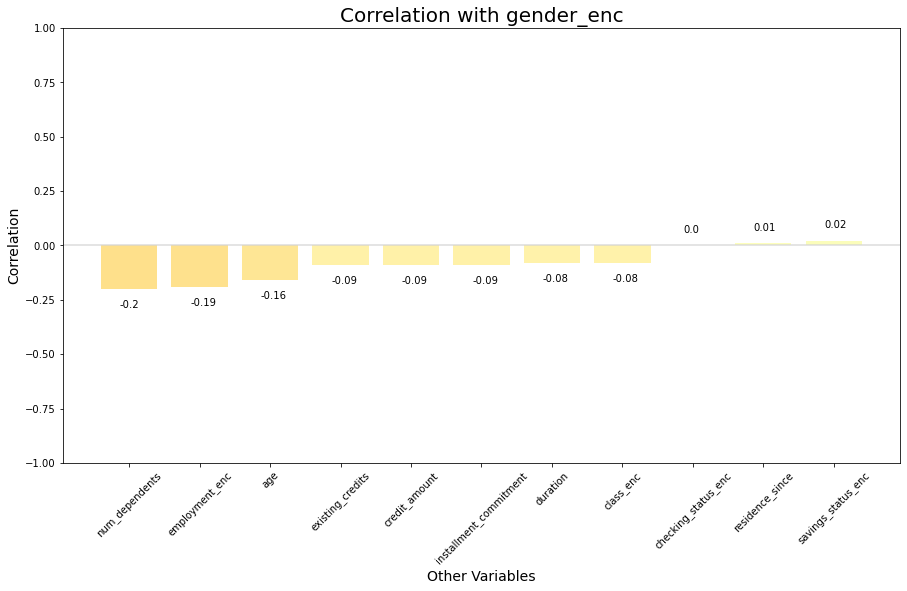

In [21]:
my.plot_corr(df_enc, 'gender_enc')

## Multivariate Chart Explorations

Now that we have some clues on correlations, let's chart some of the variables that seem to have a relation with each other.

### Duration vs. Credit Amount
Credit Amount vs. Duration had the **strongest positive correlation at 0.62**. This relationship should be obviously in a scatterplot, but I will use a Seaborn regression plot `sns.regplot()` to also draw a regression line.

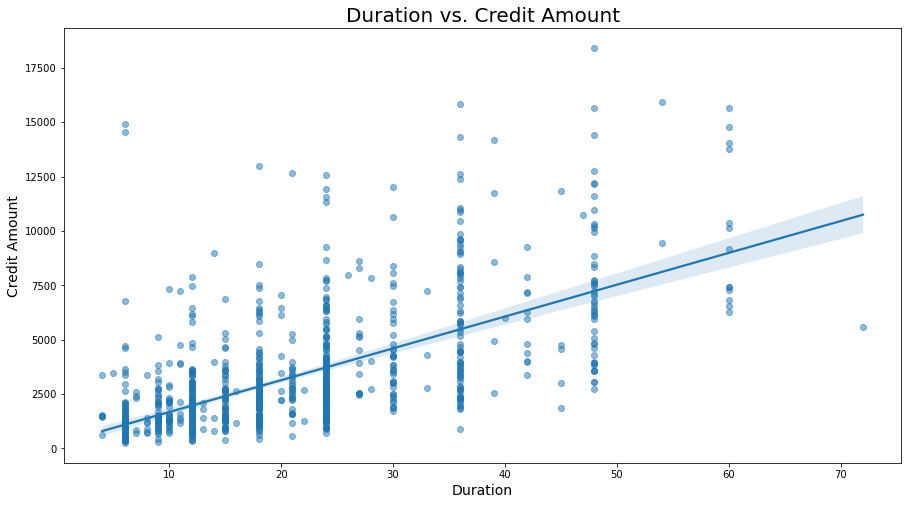

In [22]:
# Plot regression chart for Duration vs. Credit Amount
plt.figure(figsize=(15, 8))
sns.regplot(data=df, x='duration', y='credit_amount', scatter_kws={'alpha' : 0.5})
plt.title('Duration vs. Credit Amount', fontsize=20)
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Duration', fontsize=14)
plt.show()

### Installment Commitment vs. Credit Amount
Credit Amount vs. Installment Commitment had the **most negative correlation at -0.27**. Because installment commitment is not continuous data, but is ordinal, I decided to plot the relationship using box plots with `sns.boxplot()`. Here you can see the median Credit Amount decreases as the Installment Comment increases from 1 to 2 to 3 to 4. The interquartile range also decreases, although there are some outliers in all conditions.

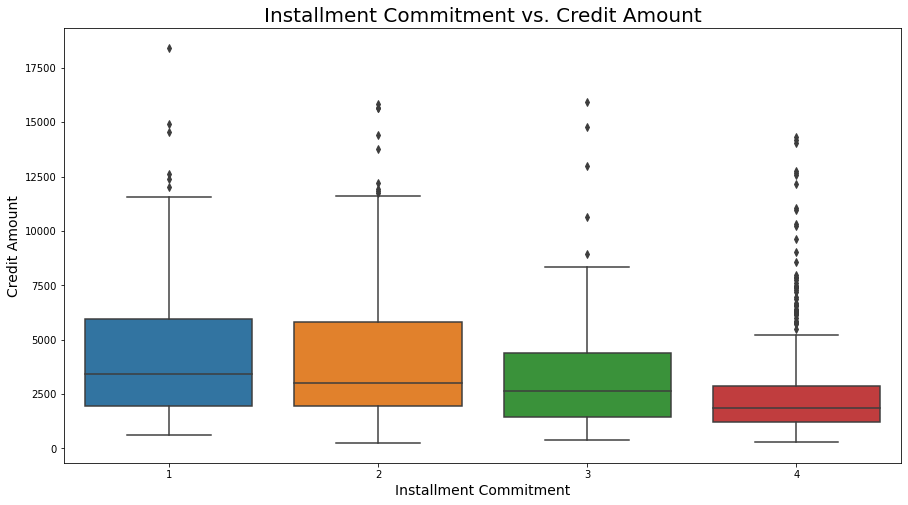

In [23]:
# Plot box plot chart for Installment Commitment vs. Credit Amount
plt.figure(figsize=(15, 8))
sns.boxplot(x='installment_commitment', y='credit_amount', data=df)
plt.title('Installment Commitment vs. Credit Amount', fontsize=20)
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Installment Commitment', fontsize=14)
plt.show()

### Age vs. Credit Amount by Gender
Age vs. Credit Amount did not have any correlation, and that's evident in the joint plot (scatter and KDE plots) below, drawn with Seaborn `sns.jointplot()`. But what's interesting about this is you can see a shift in the female distribution at the top toward the lower end of the age range. You can also see a denser cluster of yellow dots in that region. I'll take a closer look at gender next.

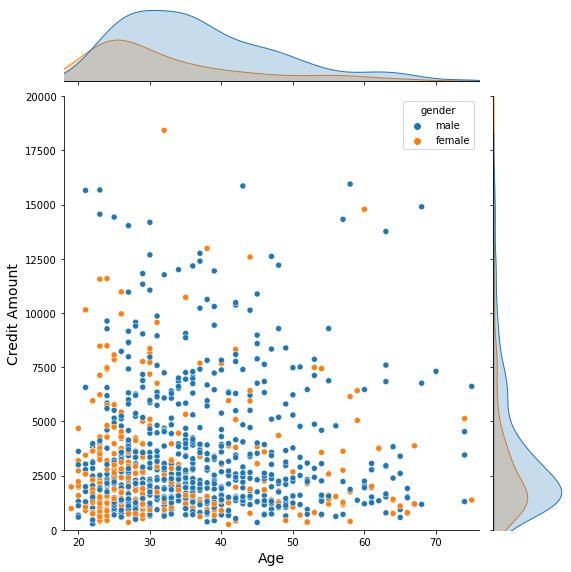

In [24]:
# Plot joint plot (scatter, KDE) for Age vs. Credit Amount by Gender
sns.jointplot(data = df_enc, x='age', y='credit_amount', kind='scatter', height=8, hue='gender', xlim=(18,76), ylim=(0,20000))
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.show()

### Gender vs. Age
Earlier I saw some weak correlations between Gender and variables like Age, Number of Dependents, and Employment. Let's take a look at some of these now with charts. Because Age is continuous, and Gender is categorical, we can compare the two distributions using box plots. Here we can see that Females tended to be younger is this customer base, which is what the earlier correlation suggested.

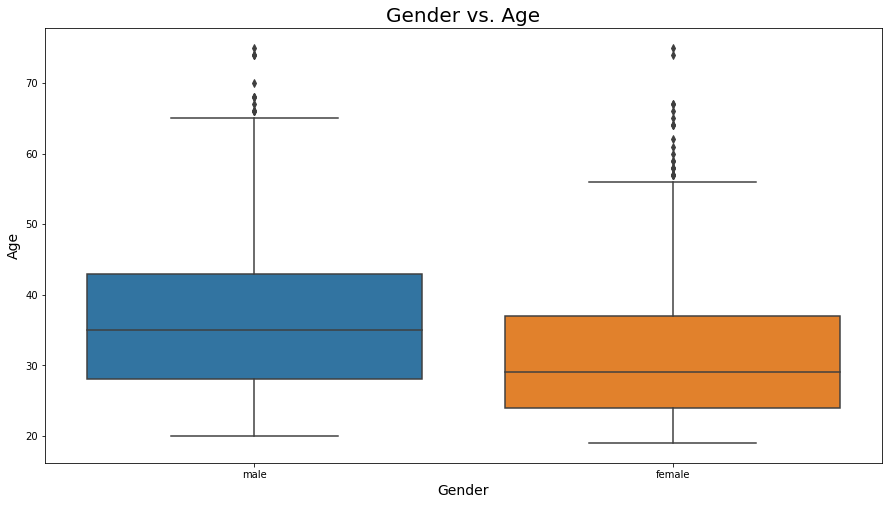

In [25]:
# Plot box plot chart for Gender vs. Age
plt.figure(figsize=(15, 8))
sns.boxplot(x='gender', y='age', data=df_enc)
plt.title('Gender vs. Age', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.show()

### Distribution of Age by Gender with Means

I was curious if there was a biomodal distribution on the Age histogram. So I next did a plot with the Seaborn `sns.histplot()` and passed in "gender" as the "hue". I first calculated the means so I could plot those as vertical lines on the histogram. There are multiple peaks, but I don't know that it corresponds to the male vs. female populations. There are peaks around the ages of 28, 38 and 48, but I don't know why. Nonetheless, the means are different, and you can see from the distribution that most of the women are between the ages of 20 and 30, which is younger than the men in this customer base.

In [26]:
# Calculate the mean ages for males and females, and prepare the labels
male_age_mean = round(df_enc[df_enc['gender']=='male']['age'].mean(), 2)
male_age_mean_label = "Male mean: " + str(male_age_mean)
print(f"Male age mean is: {male_age_mean}")

# Build some text strings with the means for labels
female_age_mean = round(df_enc[df_enc['gender']=='female']['age'].mean(), 2)
female_age_mean_label = "Female mean: " + str(female_age_mean)
print(f"Female age mean is: {female_age_mean}")

Male age mean is: 36.78
Female age mean is: 32.8


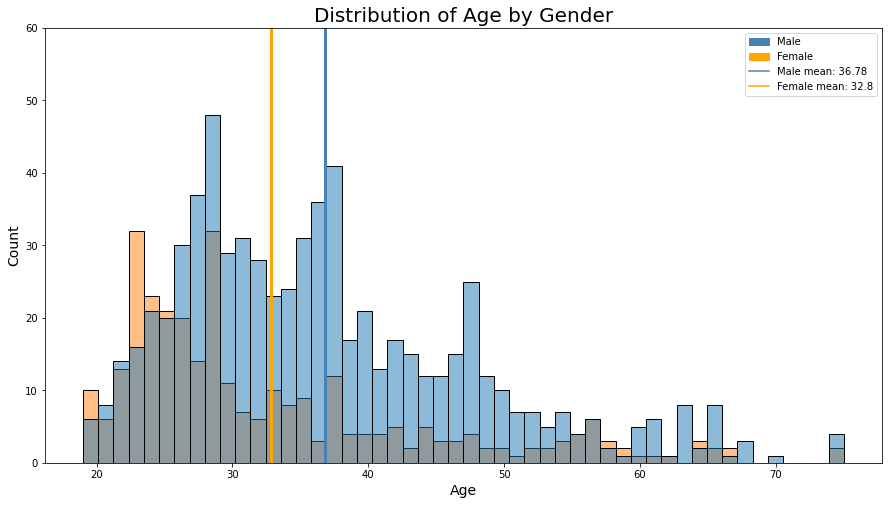

In [27]:
# Plot histogram of Age dimensioned by Gender
plt.figure(figsize=(15, 8))
sns.histplot(df_enc, x='age', hue='gender', bins=50, legend=True)
plt.title('Distribution of Age by Gender', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylim(0,60)

# Draw mean lines
plt.axvline(x = male_age_mean, color = 'steelblue', lw=3)
plt.axvline(x = female_age_mean, color = 'orange', lw=3)

# Add mean lines to legend
legend_male = mpatches.Patch(color='steelblue', label='Male')
legend_female = mpatches.Patch(color='orange', label='Female')
legend_male_mean = plt.Line2D([], [], color='steelblue', label=male_age_mean_label)
legend_female_mean = plt.Line2D([], [], color='orange', label=female_age_mean_label)

plt.legend(handles=[legend_male, legend_female, legend_male_mean, legend_female_mean])
plt.show()

### Number of Dependents vs. Age

As one would expect, the number of dependents was 2 for those older, and more likely to have children. This Seaborn boxplot shows the tighter range and higher median for 2 dependents.

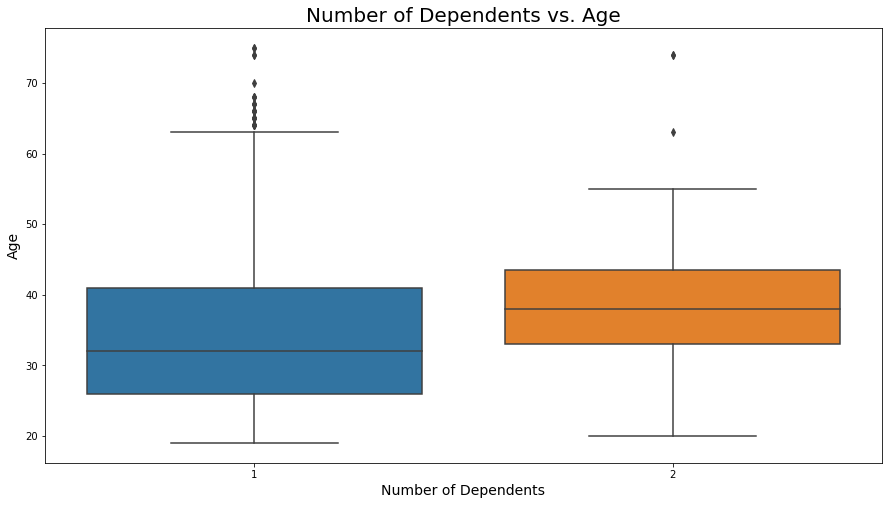

In [28]:
# Plot box plot chart for Number of Dependents vs. Age
plt.figure(figsize=(15, 8))
sns.boxplot(x='num_dependents', y='age', data=df)
plt.title('Number of Dependents vs. Age', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Number of Dependents', fontsize=14)
plt.show()

### Loan Purpose vs. Credit Amount

This is an interesting chart. You can see that the largest Credit Amount went to the "Other" category of Purpose (6,948 DEM median), and had a wide range. I'd love to know the breakdown of that category. After that, "Used Car" was the Purpose that received the most Credit Amount (4,788 DEM median). To build this chart, I had to calculate the medians with `df.groupby().median().sort_values()`, and then I passed that series to Seaborn `sns.boxplot()` using the "order" parameter.

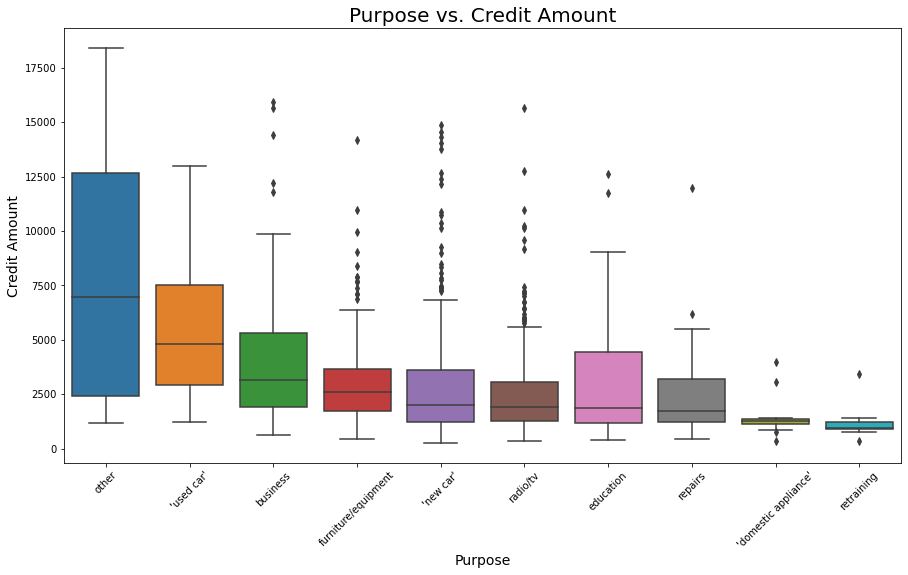

In [29]:
# Calculate the median credit_amount for each purpose
medians = df.groupby(['purpose'])['credit_amount'].median().sort_values(ascending=False)
#print(medians)

# Create a boxplot of Purpose vs. Credit Amount ordered by the medians
plt.figure(figsize=(15, 8))
sns.boxplot(x='purpose', y='credit_amount', data=df, order=medians.index)
plt.title('Purpose vs. Credit Amount', fontsize=20)
plt.ylabel('Credit Amount', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Loan Purpose Counts by Gender

I was curious if there were gender differences in Purpose, so I created a Seaborn countplot using `sns.countplot()`. I wanted to order the bars in descending order, so used `df.value_counts()` to get a list of counts, and passed that into the countplot with the "order" parameter. 

What's challenging about this is there are **more than double males (690) vs females (310)** in this data set, so any differences in purpose across females is hard to see here. So after this chart, you'll see a similar chart, but based on proportions within each gender.

In [30]:
# How many males and females are there?
print("Totals by Gender:\n" + str(df_enc['gender'].value_counts()) + "\n")

# Calculate the counts
counts = df_enc.groupby('purpose')['gender'].value_counts().unstack().sort_values(by='male', ascending=False)
print("Purpose Counts by Gender:\n" + str(counts) + "\n")

# Calculate proportions
proportions = df_enc.groupby('gender')['purpose'].value_counts(normalize=True).unstack().T.sort_values(by='male', ascending=False)
print("Purpose Proportons by Gender:\n" + str(proportions))

Totals by Gender:
male      690
female    310
Name: gender, dtype: int64

Purpose Counts by Gender:
gender                female  male
purpose                           
radio/tv                  85   195
'new car'                 70   164
furniture/equipment       74   107
'used car'                24    79
business                  19    78
education                 21    29
repairs                    5    17
other                      3     9
'domestic appliance'       6     6
retraining                 3     6

Purpose Proportons by Gender:
gender                  female      male
purpose                                 
radio/tv              0.274194  0.282609
'new car'             0.225806  0.237681
furniture/equipment   0.238710  0.155072
'used car'            0.077419  0.114493
business              0.061290  0.113043
education             0.067742  0.042029
repairs               0.016129  0.024638
other                 0.009677  0.013043
'domestic appliance'  0.019355  0.00869

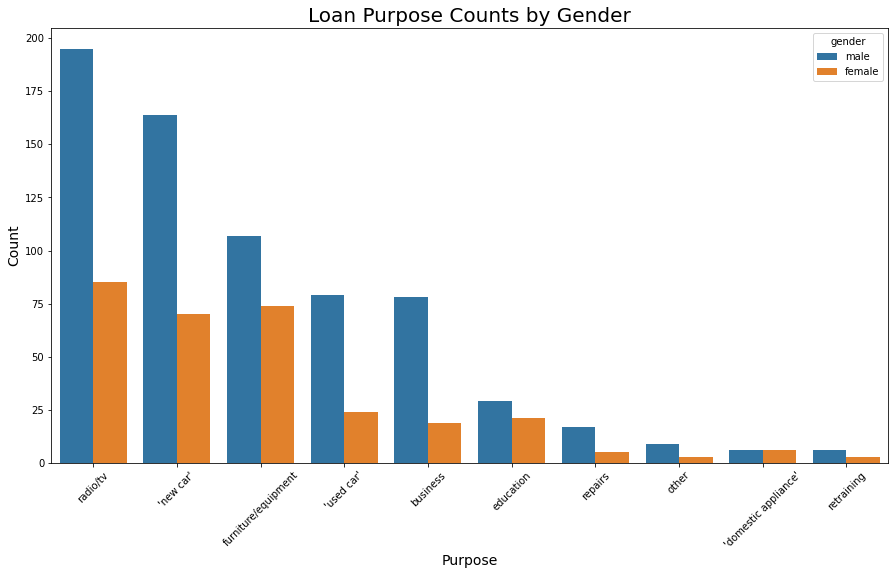

In [31]:
# Create the countplot
plt.figure(figsize=(15,8))
sns.countplot(x='purpose', hue='gender', data=df_enc, order=counts.index)
plt.title('Loan Purpose Counts by Gender', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Loan Purpose Proportions by Gender

Here, instead of showing the counts within each category, I'm showing the proportions of loan purpose within each gender side-by-side. Now some differences emerge. We see that:

* A few observations about females that aren't apparent in the chart above:
    * Females obtained a greater proportion of loans for "furniture/equipment" vs. males – this was not apparent from the count chart above!
    * Females obtained a freater proportion of loans for "education" vs. males
    * Females obtained a freater proportion of loans for "domestic appliance" vs. males
* A few observations with males as well:
    * Males obtained a greater proportion of loans for "business" vs. females
    * Males obtained a greater proportion of loans for "used car" vs. females

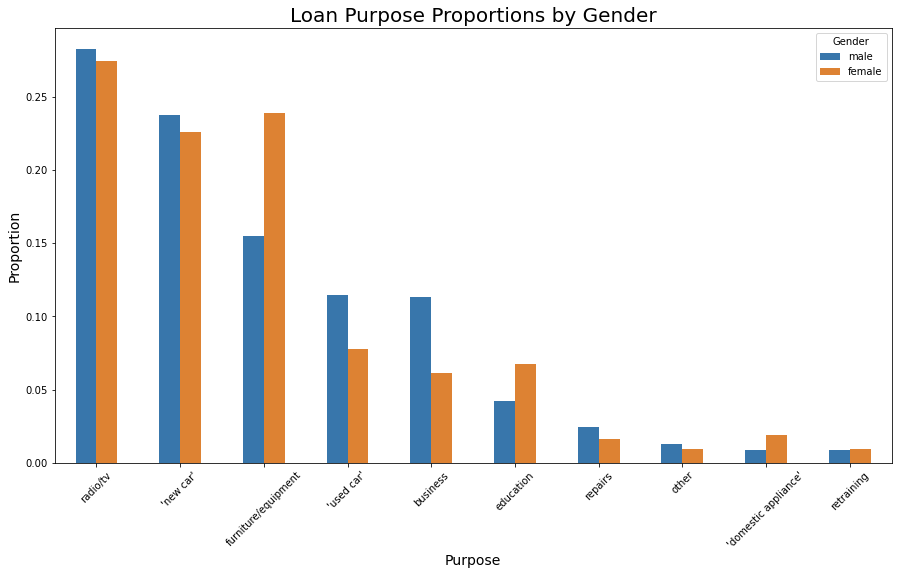

In [32]:
# Swap the columns so the charts align
proportions = proportions[['male', 'female']]

# Create the stacked bar plot
proportions.plot(kind='bar', stacked=False, figsize=(15, 8), color=['#3876AB', '#DD8233'])
plt.title('Loan Purpose Proportions by Gender', fontsize=20)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### Credit History vs. Class

Earlier we hypothesized that having critical existing credit or delays would have a negative effet on Class. But that doesn't seem to be the case. In this chart, we can see that the majority of people with a "Good" credit class had "Existing paid" or "Critical/other existing credit". It baffles me why "No credits / all paid" and "All paid" would have more "Bad" credit class. Maybe I'm not fully understanding what "Credit Class" means.

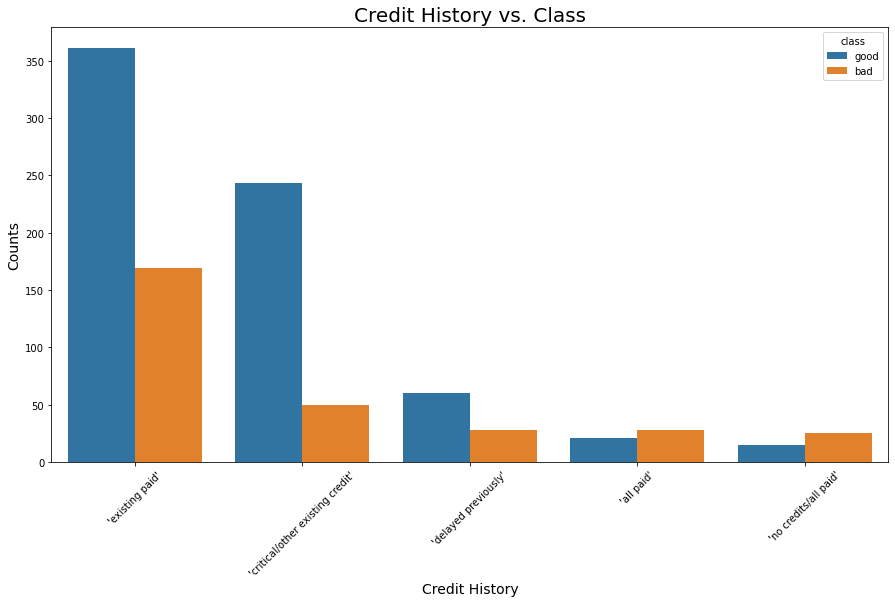

In [33]:
# Order the bars by Credit History count for good
history_order = df_enc.groupby('credit_history')['class'].value_counts().unstack().sort_values(by='good', ascending=False)

# Create a countplot of Credit History and Class
plt.figure(figsize=(15, 8))
sns.countplot(x='credit_history', hue='class', data=df, order=history_order.index)
plt.title('Credit History vs. Class', fontsize=20)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Credit History', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Employment vs. Class

Earlier we hypothesized that being unemployed would have a negative effet on Class. But that doesn't seem to be the case. Maybe if you're unemployed, you haven't had enough time to make mistakes that would lead to a bad credit crisk. 

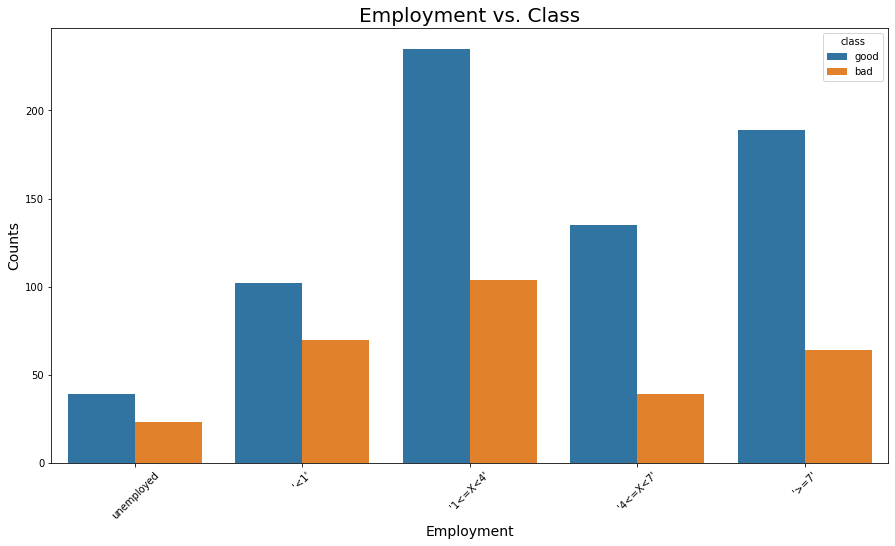

In [34]:
# Order the bars in logical order
employment_order = ['unemployed', "'<1'", "'1<=X<4'", "'4<=X<7'", "'>=7'"]


# Create a countplot of Employment and Class
plt.figure(figsize=(15, 8))
sns.countplot(x='employment', hue='class', data=df, order=employment_order)
plt.title('Employment vs. Class', fontsize=20)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Employment', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Checking and Savings Status vs. Class

Earlier we hypothesized that having low or no savings would have a negative impact on Class. Interestingly, most of the "Good" credit class had "No checking" and "Less than 100" in their savings account. But the one area that seemed to have most of the "Bad" credit class are those with "Less than 100" in their savings account.

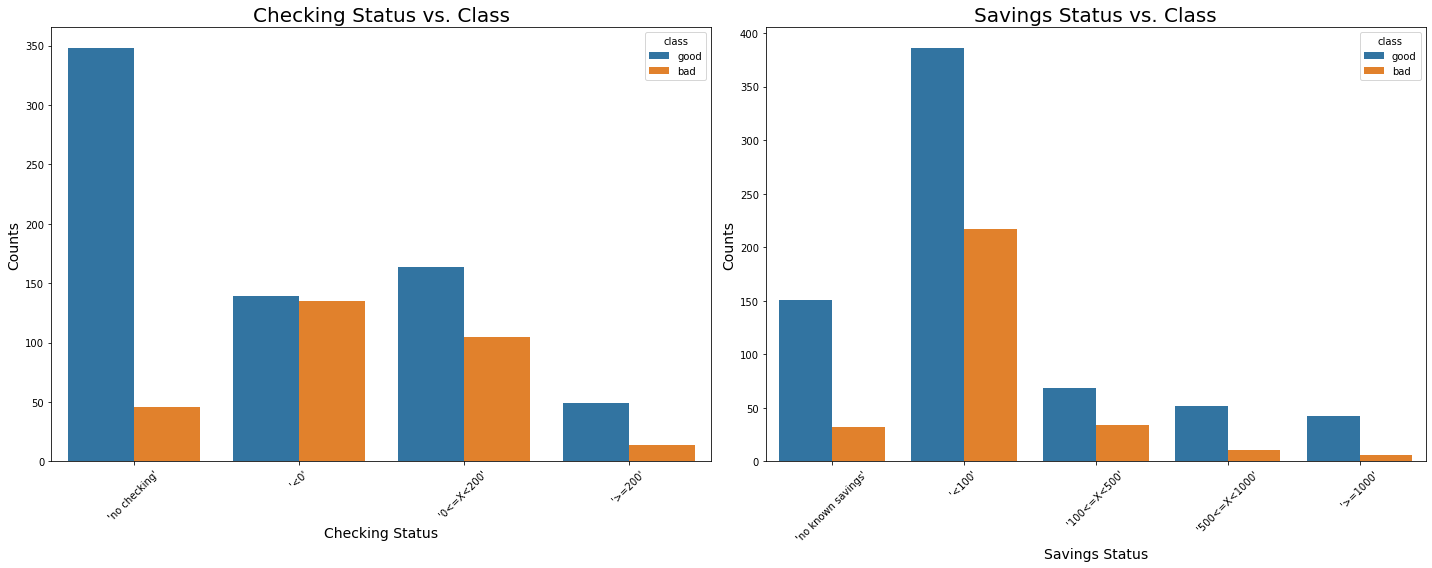

In [35]:
# Order the values logically
savings_order = ["'no known savings'", "'<100'", "'100<=X<500'", "'500<=X<1000'", "'>=1000'"]
checking_order = ["'no checking'", "'<0'", "'0<=X<200'", "'>=200'"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a countplot of Checking Status and Class
sns.countplot(ax=axes[0], x='checking_status', hue='class', data=df, order=checking_order)
axes[0].set_title('Checking Status vs. Class', fontsize=20)
axes[0].set_ylabel('Counts', fontsize=14)
axes[0].set_xlabel('Checking Status', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Create a countplot of Savings Status and Class
sns.countplot(ax=axes[1], x='savings_status', hue='class', data=df, order=savings_order)
axes[1].set_title('Savings Status vs. Class', fontsize=20)
axes[1].set_ylabel('Counts', fontsize=14)
axes[1].set_xlabel('Savings Status', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Summary of Findings

Here are the key insights from my analysis:

* The majority of customers have a **"good" credit class** (70%)
* Almost all are **foreign workers!** (96.3%) I do believe this dataset came from Germany
* Most are **male** (69%) **skilled workers** (63%) that **own a home** (71.3%) and have just **1 dependent** (84.5%), themselves
* The **women are younger than the men**, with most between the ages of 20 and 30
* The most popular purpose is for a **Radio or TV** (28%), followed closely by a **new car** (23.4%)
* However, **Females** obtained a greater proportion of loans for **furniture/equipment, education, and domestic appliance** vs. males
* Most customers (60.3%) have a **Savings** with **less than 100 Deutsche Mark** (1 DEM = \$0.55 USD)! No wonder they are applying for credit
* The **average credit amount** was 3,271 DEM (\$1,825 USD)
* The **largest credit amount** was for the **Other** category or purpose (6,948 DEM median), followed by **Used Car** (4,788 DEM median)
* **Credit Amount vs. Duration** have the most positive correlation, which is strong at 0.62
* **Credit Amount vs. Installment Commitment** have the most negative correlation, which is weak at -0.27